## Extract features from sparse matrix A

In [1]:
from np_to_tfrecord import np_to_tfrecords
import numpy as np
import tensorflow as tf
import os
import json
import functools
from scipy.sparse import coo_matrix
from queue import Queue
import networkx as nx
import matplotlib.pyplot as plt
tf.enable_eager_execution()

2023-02-16 02:37:17.232450: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
W0216 02:37:19.977114 140736053661296 module_wrapper.py:139] From /tmp/ipykernel_195914/634948247.py:11: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.



# Generate Data

In [2]:
A_matrix_path = "/gpfs/u/scratch/ODLC/ODLCsfsh/deepmind-research_soha/meshgraphnets/data/advection/A_ex9.txt"

In [3]:
# Load the data from the text file
A_info = np.loadtxt(A_matrix_path)

# Extract the row, column, and value arrays from the data
row_A = A_info[:, 0].astype(int)
col_A = A_info[:, 1].astype(int)
val_A = A_info[:, 2]

# Create the sparse matrix using COO format
A = coo_matrix((val_A, (row_A, col_A)))

print(A.shape)

(36865, 36865)


## Convert sparse matrix A to adjacency matrix

In [4]:
# Convert the sparse matrix into a dense matrix and replace non-zero elements with 1
dense_A = np.array(A.todense())
adj_matrix = np.where(dense_A > 0, 1, 0)

print(adj_matrix.shape)

(36865, 36865)


## Visualize the graph using Networkx library

In [5]:
import graphviz as gv

# Extract a 10 by 10 sub-matrix starting at position (5, 5)
adj_matrix = adj_matrix[5:40, 5:40]

# Create a new Graphviz graph
g = gv.Graph()

# Add nodes to the graph
for i in range(len(adj_matrix)):
    g.node(str(i))

# Add edges to the graph
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        if adj_matrix[i][j] == 1:
            g.edge(str(i), str(j))

# Render and save the graph
g.render(filename='graph', format='png')


'graph.png'

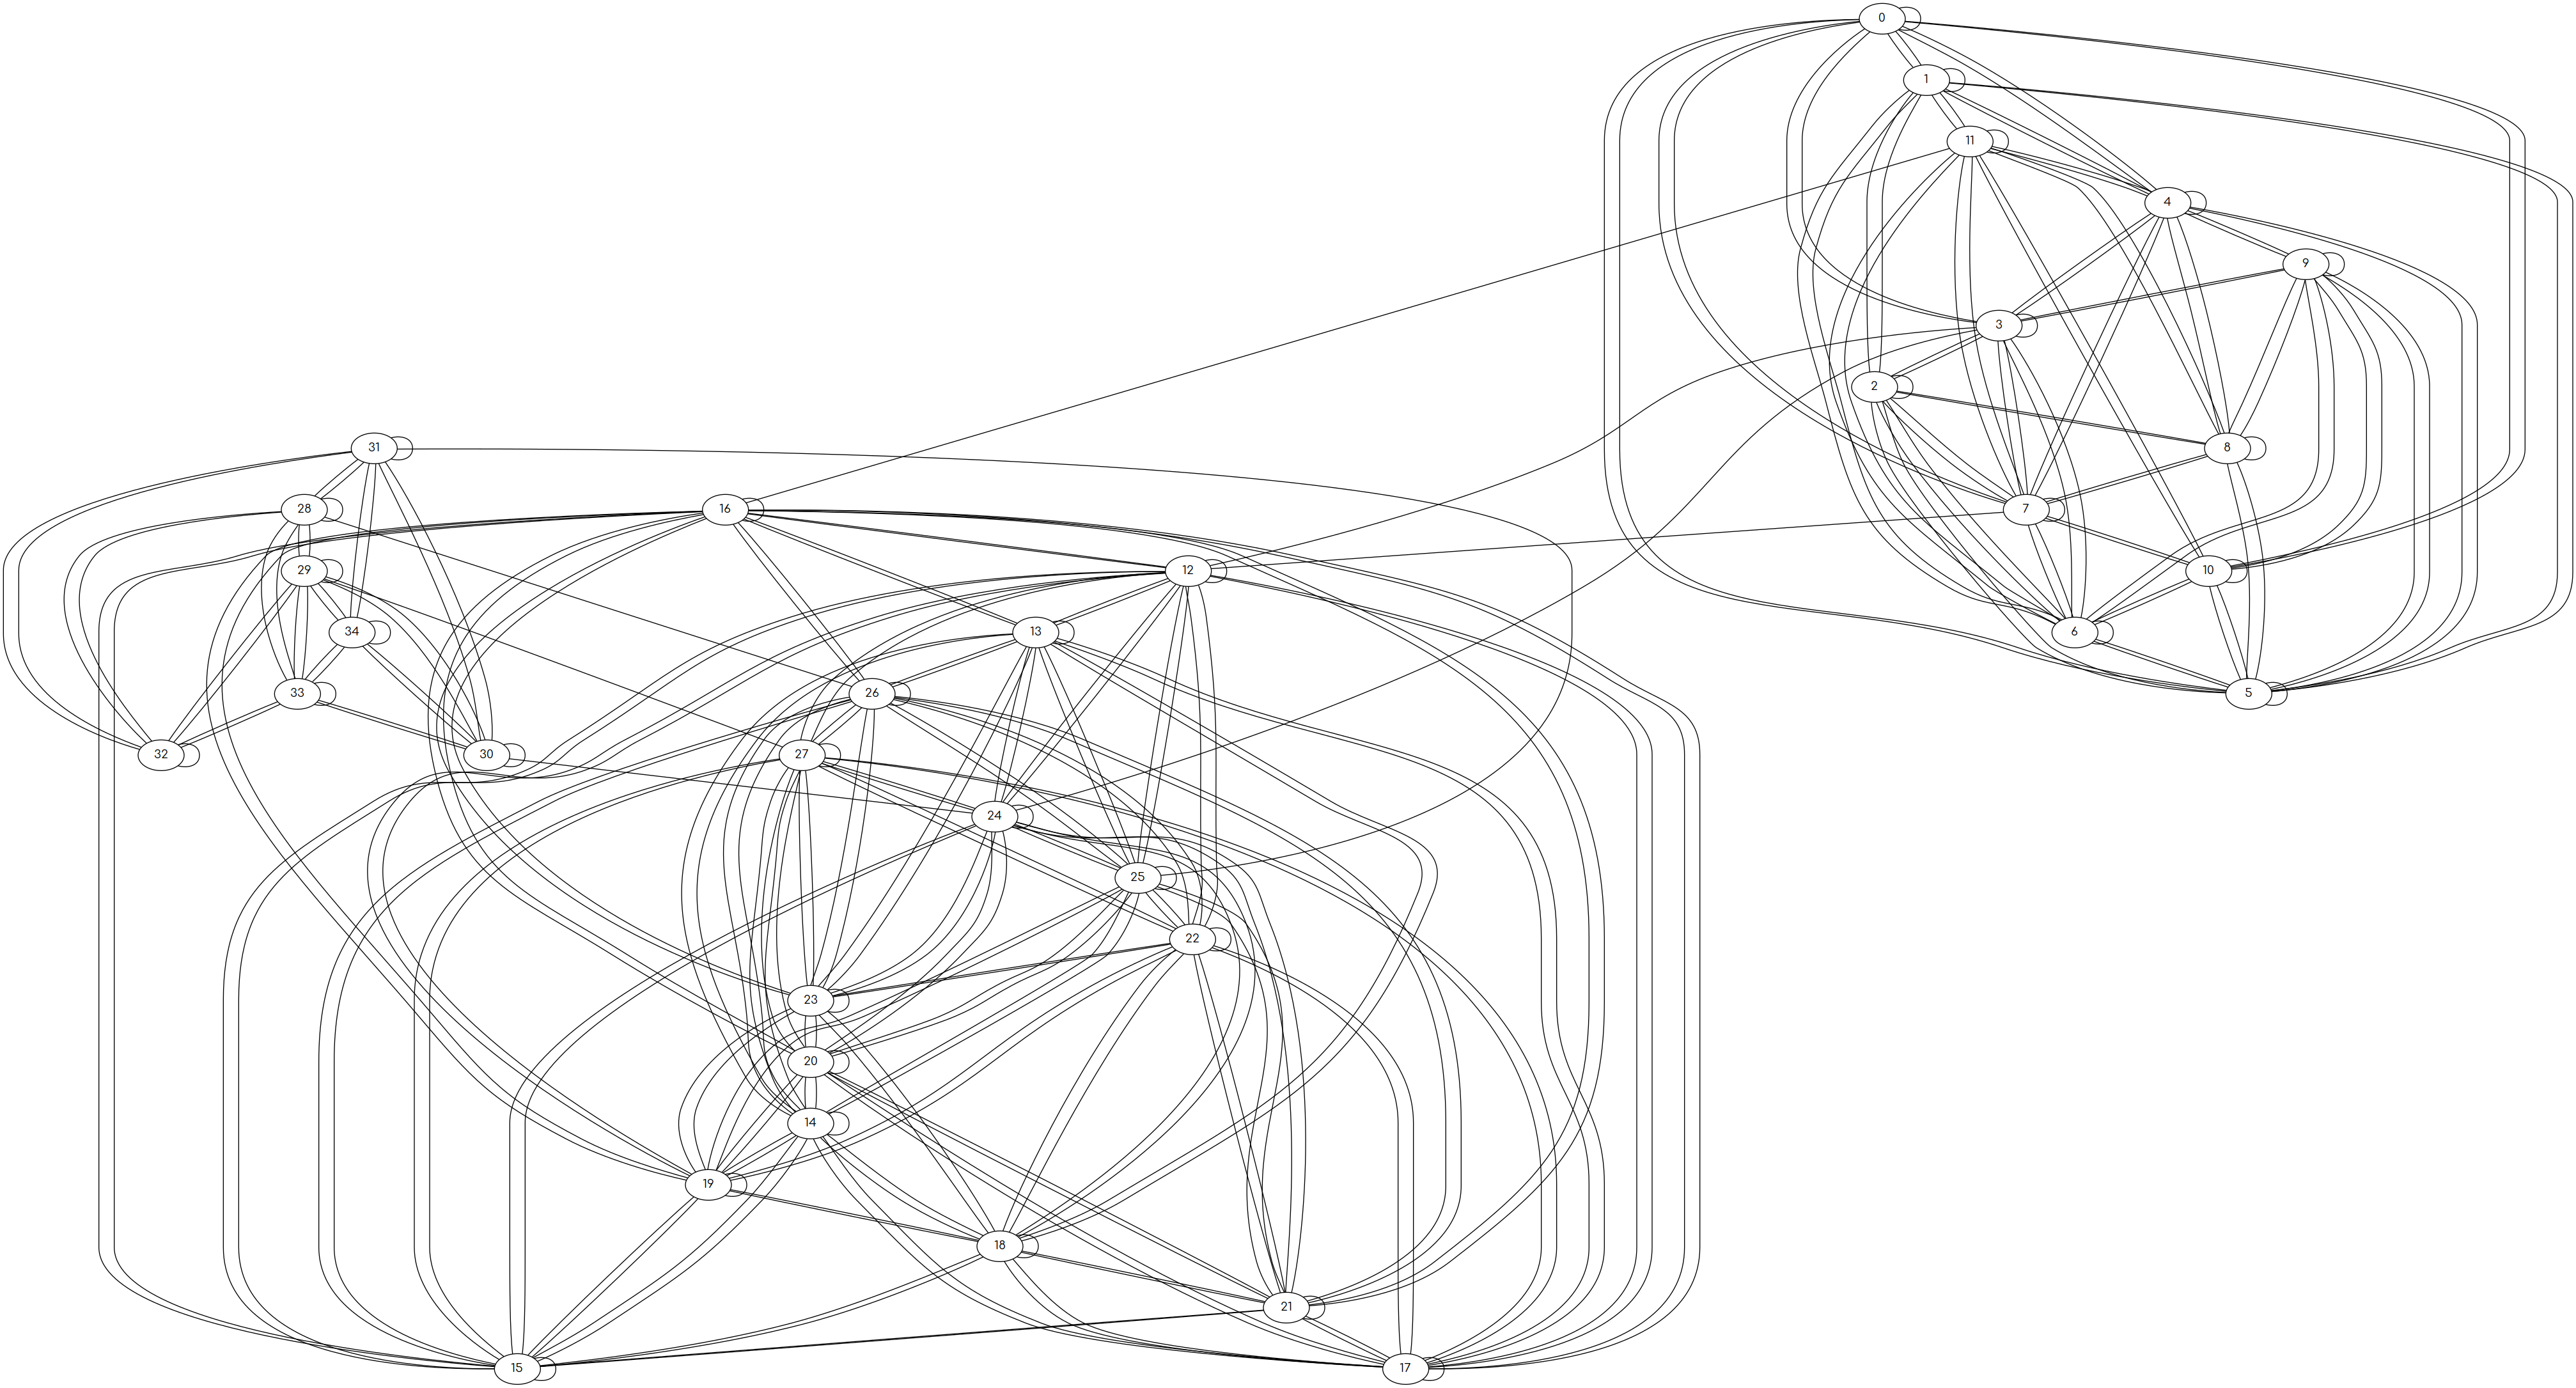

In [6]:
from PIL import Image
from IPython.display import display

# Load the PNG image
img = Image.open('graph.png')

# Display the image
display(img)

In [7]:
# # Extract a 10 by 10 sub-matrix starting at position (5, 5)
# sub_adj_matrix = adj_matrix[5:15, 5:15]

# # Convert the adjacency matrix to a NetworkX graph
# G_sub = nx.from_numpy_matrix(sub_adj_matrix)

# # Draw the graph
# nx.draw(G_sub, with_labels=True)
# plt.show()

In [8]:
# # Choose a subset of nodes to visualize
# nodes_to_visualize = [0, 1, 2]

# # Compute the Kamada-Kawai layout for the subset of nodes
# pos = nx.kamada_kawai_layout(G.subgraph(nodes_to_visualize))

# # Draw the subset of nodes
# nx.draw_networkx_nodes(G.subgraph(nodes_to_visualize), pos)

# # Draw the edges
# nx.draw_networkx_edges(G.subgraph(nodes_to_visualize), pos)

# # Add labels to the nodes
# labels = {i: str(i) for i in nodes_to_visualize}
# nx.draw_networkx_labels(G.subgraph(nodes_to_visualize), pos, labels)

# # Show the plot
# plt.show()